In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('./Iris.csv')

In [3]:
dataset.shape

(150, 6)

In [4]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
import numpy as np

class MyKNN:
    """
    Implementação simplificada do algoritmo KNN (K-Nearest Neighbors).
    """

    def __init__(self, k=5):
        # número de vizinhos considerados
        self.k = k

    def fit(self, X, y):
        """
        Guarda os dados de treino.
        X -> matriz de características (features)
        y -> vetor de rótulos (labels)
        """
        if X.shape[0] != y.shape[0]:
            raise ValueError("X e y precisam ter o mesmo número de amostras.")
        if self.k > X.shape[0]:
            raise ValueError("k não pode ser maior que o número de amostras.")

        self.X_train = X
        self.y_train = y
        self.classes_ = np.unique(y)  # rótulos possíveis

    def _predict_one(self, x):
        """
        Faz a previsão para uma única amostra x.
        """
        # calcula distâncias euclidianas entre x e todos os pontos de treino
        distances = np.linalg.norm(self.X_train - x, axis=1)
        
        # pega os índices dos k vizinhos mais próximos
        neighbors_idx = np.argsort(distances)[:self.k]
        
        # pega os rótulos desses vizinhos
        neighbor_labels = self.y_train[neighbors_idx]
        
        # retorna o rótulo mais comum entre os vizinhos
        return np.bincount(neighbor_labels).argmax()

    def predict(self, X_test):
        """
        Faz previsões para várias amostras.
        """
        return np.array([self._predict_one(x) for x in X_test])


In [11]:
import numpy as np

def single_prediction(X, y, x_test, k):
    """
    Faz a previsão de classe para uma única amostra usando KNN.
    
    X -> dados de treino (features)
    y -> rótulos de treino
    x_test -> amostra a ser classificada
    k -> número de vizinhos a considerar
    """
    # 1. Calcula as distâncias euclidianas (ao quadrado, sem raiz para eficiência)
    distances = np.sum((X - x_test) ** 2, axis=1)
    
    # 2. Ordena os índices das distâncias e seleciona os k menores
    neighbors_idx = np.argsort(distances)[:k]
    
    # 3. Pega os rótulos desses vizinhos
    neighbor_labels = y[neighbors_idx]
    
    # 4. Retorna a classe mais comum entre os vizinhos
    unique, counts = np.unique(neighbor_labels, return_counts=True)
    return unique[np.argmax(counts)]


In [12]:
# Instantiate learning model (k = 3)
my_classifier = MyKNN(k=7)

# Fitting the model
my_classifier.fit(X_train, y_train)

# Predicting the Test set results
my_y_pred = my_classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


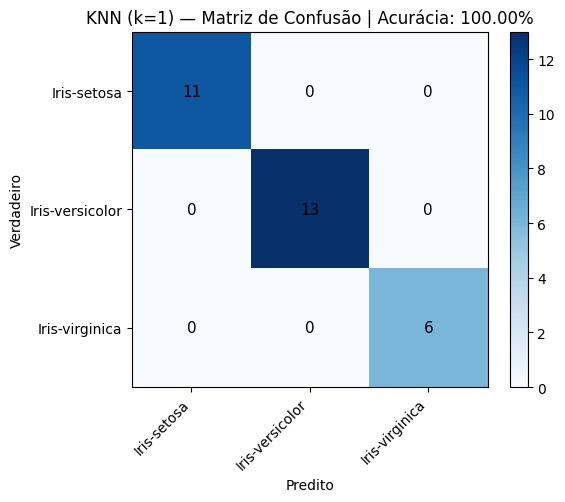

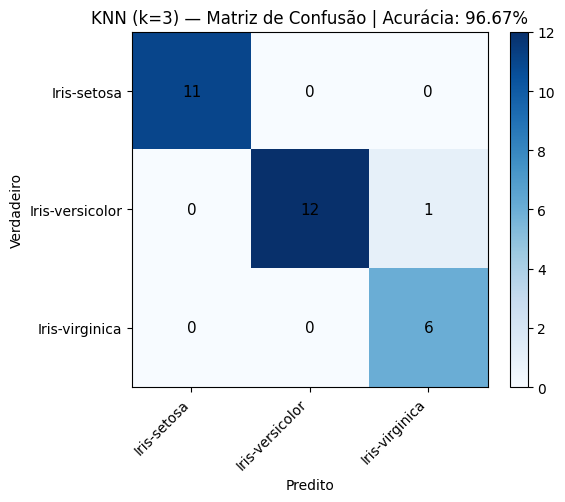

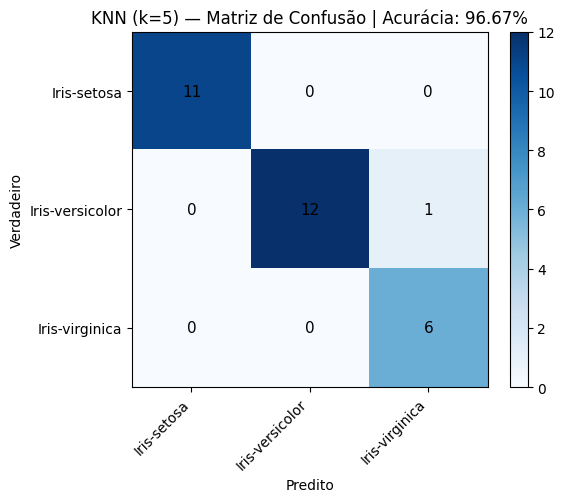

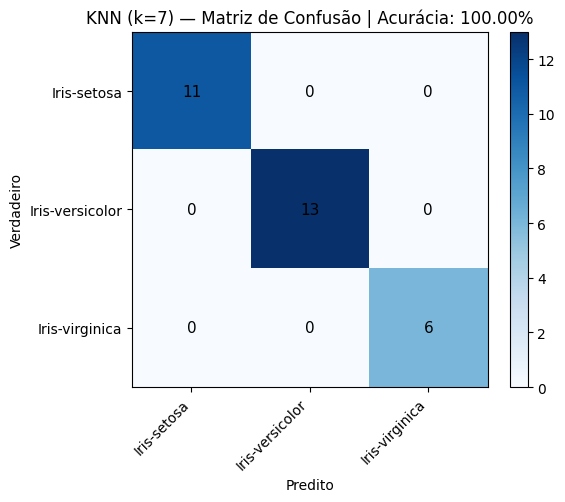

In [14]:
# Matriz de confusão gráfica para k = 1, 3, 5, 7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Tenta recuperar nomes das classes (se o LabelEncoder 'le' existir)
try:
    class_names = list(le.classes_)
except NameError:
    # Fallback: usa rótulos numéricos
    class_names = [str(c) for c in sorted(np.unique(y_train))]

def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)
    plt.grid(False)  # Remove as linhas da grade
    # Anotações nas células
    thresh = cm.max() / 2.0 if cm.max() > 0 else 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     fontsize=11)
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.tight_layout()
    plt.show()

for k in (1, 3, 5, 7):
    knn = MyKNN(k=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    cm_k = confusion_matrix(y_test, y_pred_k)
    acc_k = accuracy_score(y_test, y_pred_k) * 100
    title = f'KNN (k={k}) — Matriz de Confusão | Acurácia: {acc_k:.2f}%'
    plot_confusion_matrix(cm_k, class_names, title)


In [15]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


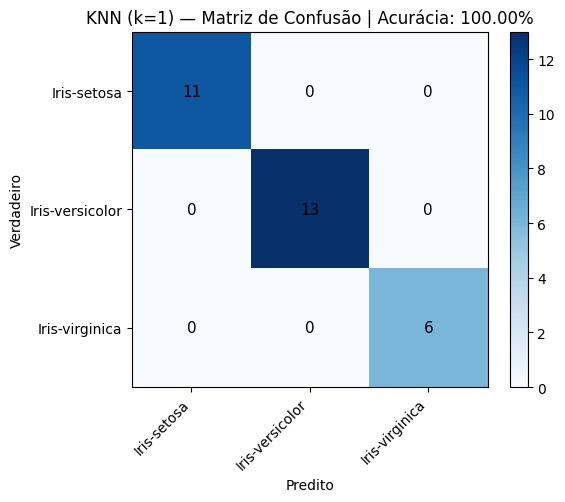

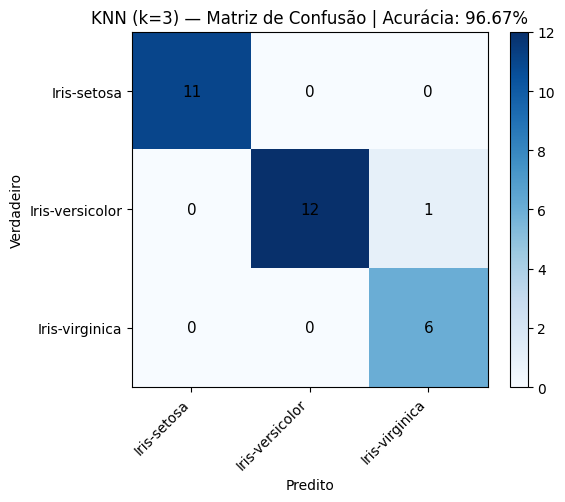

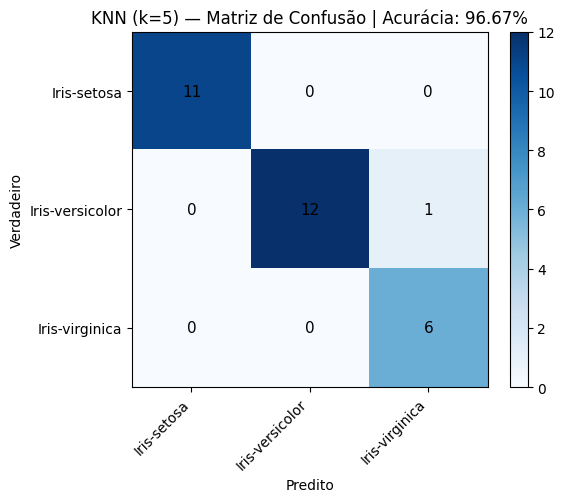

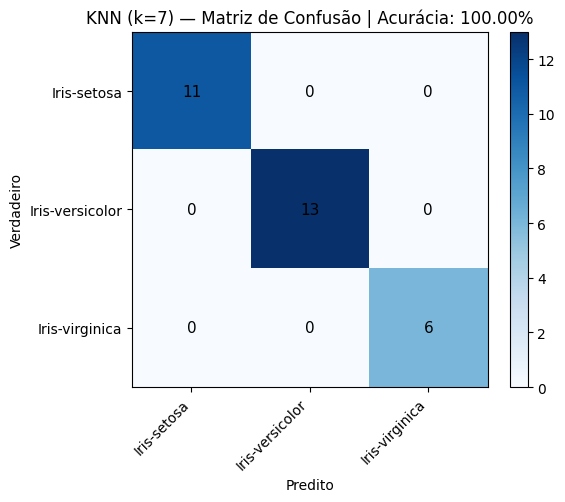

In [17]:
# Matriz de confusão gráfica para k = 1, 3, 5, 7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Tenta recuperar nomes das classes (se o LabelEncoder 'le' existir)
try:
    class_names = list(le.classes_)
except NameError:
    # Fallback: usa rótulos numéricos
    class_names = [str(c) for c in sorted(np.unique(y_train))]

def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)
    plt.grid(False)  # Remove as linhas da grade
    # Anotações nas células
    thresh = cm.max() / 2.0 if cm.max() > 0 else 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     fontsize=11)
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.tight_layout()
    plt.show()

for k in (1, 3, 5, 7):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    cm_k = confusion_matrix(y_test, y_pred_k)
    acc_k = accuracy_score(y_test, y_pred_k) * 100
    title = f'KNN (k={k}) — Matriz de Confusão | Acurácia: {acc_k:.2f}%'
    plot_confusion_matrix(cm_k, class_names, title)
